Tutorial for Mickey
================

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import mickey.mickey
import mickey.plot
import nmmn.lsd

In [3]:
%cd ~/codes/mickey/examples/

/home/nemmen/codes/mickey/examples


# Read a given simulation state

Reads snapshot 3678

In [4]:
p=mickey.mickey.Pluto(3678)

Reading Data file : /home/nemmen/codes/mickey/examples/data.3678.dbl


To supress the status message, use 

    c=mickey.mickey.Pluto(3678, stdout=False)

# Access model variables

The *c* object's now holds attributes corresponding to the variables of your snapshot. For instance:
	
- grid: `x1`,`x2`,`x3` (1D arrays)
- velocities: `v1`, `v2`, `v3` (N-dimensional, depending on your model)
- pressure `p` (N-dimensional)
- density `rho` (N-dimensional)
- number of grid cells: `n1`, `n2`, `n3` (integers)
- time in code units: `t` (float)

In [10]:
p.x1.shape

(400,)

In [11]:
p.rho.shape

(400, 200)

# Plot the coordinate grid

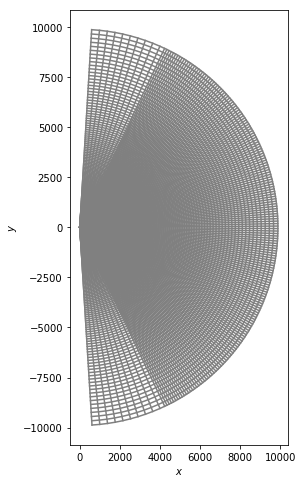

In [19]:
# plot coordinate grid
figure(figsize=(8,8))
mickey.plot.mesh(p)

# Plot density field

Before using matplotlib's routines to plot the fields, you need to convert from the coordinate basis usually adopted in accretion flow simulations (usually spherical) to cartesian. We have special C-extensions to handle that *fast*. First you need to install the [PGI compilers](https://www.pgroup.com) ([installation instructions](https://intothewave.wordpress.com/2015/02/17/pgi-fortran-compiler-on-linux-mac-os-x/)) which come with `pgcc`. 

If you have a NVIDIA GPU, good for you! Assuming you have all drivers and the PGI compiler installed, issue:

    cd src
    make

The code also works in CPUs though not so fast. In this case, you need to:

1. open `src/Makefile`
2. uncomment the line that begins with `CPUFLAGS`
3. `cd src`, `make` to compile with CPU-support only

If you had the PGI compiler already installed when you installed Mickey itself, then the C-code was compiled automatically. Otherwise, you have to do it manually.

Converts the arrays to cartesian coordinates using the GPU

In [40]:
%time c=p.regridFast(n=1500, xlim=100) # cartesian

CPU times: user 2.57 s, sys: 15.8 ms, total: 2.59 s
Wall time: 441 ms


If you want more control over your plot, you can do it manually:

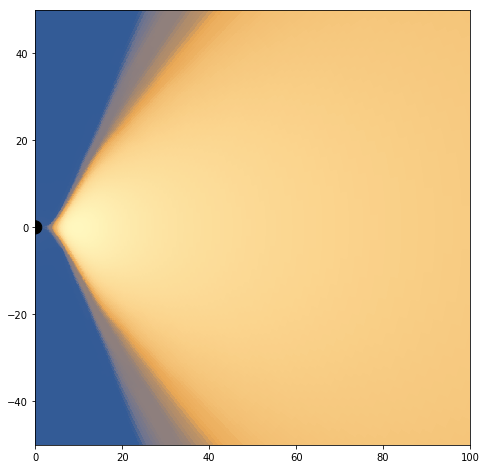

In [41]:
import nmmn.plots 

figure(figsize=(8,8))
pcolormesh(c.X1, c.X2, log10(c.rho), cmap=nmmn.plots.wolframcmap())
#axes().set_aspect('equal')
circle2=Circle((0,0),p.x1[0],color='k')
gca().add_artist(circle2)
xlim(0,100)
ylim(-50,50)
axes().set_aspect('equal')

Or you can use our convenient `density` routine which does the job for you:

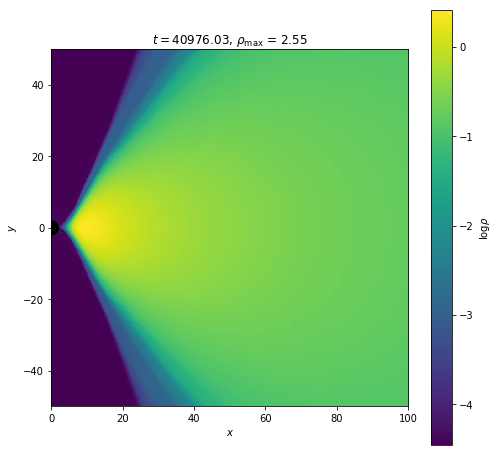

In [37]:
figure(figsize=(8,8))
mickey.plot.density(c, lim=50, bh=[2,'k'])